 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [39]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
os.getcwd()

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [49]:
# Reading whale returns
df_path = Path('/Users/jacobfigueroa/Downloads/PythonHW/whale_returns.csv')
df = pd.read_csv(df_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [50]:
# Count nulls
df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [51]:
# Drop nulls
df=df.dropna()
print(df)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [52]:
# Reading algorithmic returns
df1_path = Path('/Users/jacobfigueroa/Downloads/PythonHW/algo_returns.csv')
df1 = pd.read_csv(df1_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [53]:
# Count nulls
df1.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [54]:
# Drop nulls
df1=df1.dropna()
print(df1)

              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1235 rows x 2 columns]


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [55]:
# Reading S&P 500 Closing 
df2_path = Path('/Users/jacobfigueroa/Downloads/PythonHW/sp500_history.csv')
df2 = pd.read_csv(df2_path,index_col='Date', parse_dates=True, infer_datetime_format=True)
df2.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [56]:
# Check Data Types
df2['Close'].dtype

dtype('O')

In [57]:
# Fix Data Types
df2["Close"] = df2["Close"].str.replace("$", "")
df2["Close"] = df2["Close"].astype('float')

/var/folders/g6/y3nghk_j6fn9bprgztkqx3x00000gn/T/ipykernel_94230/250683398.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2["Close"] = df2["Close"].str.replace("$", "")


In [58]:
# Calculate Daily Returns
df2_Daily_Return=df2.pct_change().dropna()
df2_Daily_Return

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [59]:
# Drop nulls
df2_Daily_Return.dropna()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [61]:
# Rename `Close` Column to be specific to this portfolio.
df2_Daily_Return=df2_Daily_Return.rename(columns={"Close":"S&P 500"})
df2_Daily_Return.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [63]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
Returns = pd.concat([df, df1, df2_Daily_Return], axis="columns", join="inner")
Returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

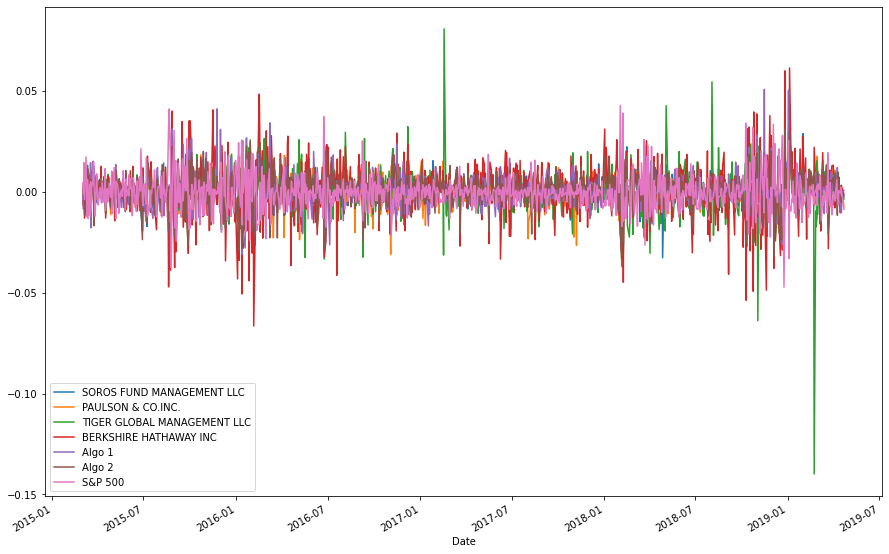

In [77]:
# Plot daily returns of all portfolios
Returns.plot(figsize=(15, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

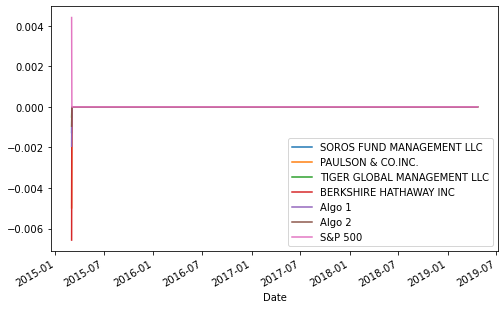

In [78]:
# Calculate cumulative returns of all portfolios
Returns_cumu=Returns.cumprod()
# Plot cumulative returns
Returns_cumu.plot(figsize=(8,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

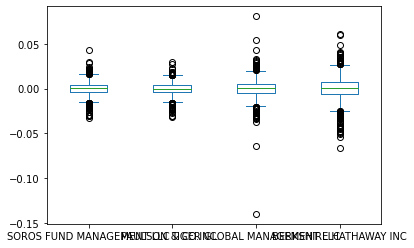

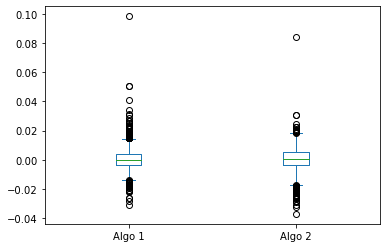

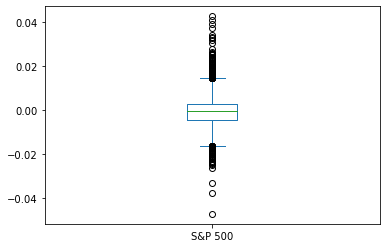

In [80]:
# Box plot to visually show risk
df.plot.box()
df1.plot.box()
df2_Daily_Return.plot.box()

### Calculate Standard Deviations

In [81]:
# Calculate the daily standard deviations of all portfolios
Std_deviation=Returns.std()
print(Std_deviation)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [69]:
# Calculate  the daily standard deviation of S&P 500
df2_Daily_Return.std()
# Determine which portfolios are riskier than the S&P 500
Std_deviation=Std_deviation.sort_values(ascending=False)
Std_deviation.head()

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
dtype: float64

### Calculate the Annualized Standard Deviation

In [70]:
# Calculate the annualized standard deviation (252 trading days)
annual_std=Std_deviation*np.sqrt(252)
annual_std.head()

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [76]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling=Std_deviation.rolling(window=20)
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [89]:
# Calculate the correlation
correlation=Returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

NameError: name 'sns' is not defined

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [92]:
# Calculate covariance of a single portfolio
cov = Returns['Algo 1'].cov(Returns['S&P 500'])
# Calculate variance of S&P 500
variance=Returns['S&P 500'].var()
# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [93]:
# Annualized Sharpe Ratios
sharpe = ((Returns.mean()-Returns['S&P 500'].mean()) * 252) / (Returns.std() * np.sqrt(252))
sharpe

SOROS FUND MANAGEMENT LLC      0.906838
PAULSON & CO.INC.              0.142411
TIGER GLOBAL MANAGEMENT LLC    0.278448
BERKSHIRE HATHAWAY INC         0.951436
Algo 1                         1.953767
Algo 2                         1.018189
S&P 500                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

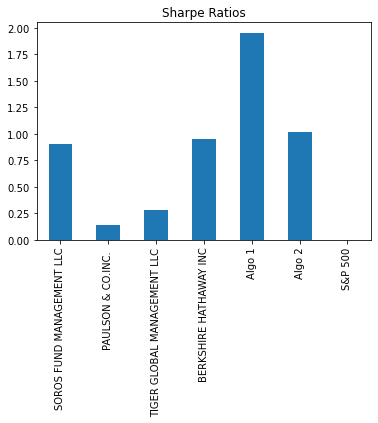

In [94]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot(kind="bar",title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [ ]:
Yes. The algorithmic startegies do outperform both markets

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [96]:
# Reading data from 1st stock
cost_path = Path('/Users/jacobfigueroa/Downloads/PythonHW/cost_historical.csv')
cost = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [97]:
# Reading data from 2nd stock
aapl_path = Path('/Users/jacobfigueroa/Downloads/PythonHW/aapl_historical.csv')
aapl = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [98]:
# Reading data from 3rd stock
goog_path = Path('/Users/jacobfigueroa/Downloads/PythonHW/goog_historical.csv')
goog = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [99]:
# Combine all stocks in a single DataFrame
Returns2 = pd.concat([cost, goog, aapl], axis="columns", join="inner")
Returns2.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,COST,243.47,GOOG,1162.38,AAPL,200.72
2019-05-08,COST,241.34,GOOG,1166.27,AAPL,202.90
2019-05-07,COST,240.18,GOOG,1174.10,AAPL,202.86
2019-05-06,COST,244.23,GOOG,1189.39,AAPL,208.48
2019-05-03,COST,244.62,GOOG,1185.40,AAPL,211.75


In [100]:
# Reset Date index
Returns2.set_index='Trade DATE'

In [101]:
# Reorganize portfolio data by having a column per symbol
Returns2.columns
columns=["Symbol", "AAPL", "Symbol", "GOOD", "Symbol", "COST"]
Returns2.columns=columns
Returns2=Returns2.drop(columns=["Symbol"])
Returns2.head

<bound method NDFrame.head of               AAPL     GOOD    COST
Trade DATE                         
2019-05-09  243.47  1162.38  200.72
2019-05-08  241.34  1166.27  202.90
2019-05-07  240.18  1174.10  202.86
2019-05-06  244.23  1189.39  208.48
2019-05-03  244.62  1185.40  211.75
...            ...      ...     ...
2018-05-17  199.60  1078.59  186.99
2018-05-16  198.71  1081.77  188.18
2018-05-15  195.48  1079.23  186.44
2018-05-14  195.88  1100.20  188.15
2018-05-11  195.76  1098.26  188.59

[250 rows x 3 columns]>

In [103]:
# Calculate daily returns
Returns2_Daiil_Returns=Returns2.pct_change()
# Drop NAs

# Display sample data
Returns2_Daiil_Returns.dropna()

,AAPL,GOOD,COST
Trade DATE,,,
2019-05-08,-0.008749,0.003347,0.010861
2019-05-07,-0.004806,0.006714,-0.000197
2019-05-06,0.016862,0.013023,0.027704
2019-05-03,0.001597,-0.003355,0.015685
2019-05-02,-0.007890,-0.019226,-0.012279
...,...,...,...
2018-05-17,0.003217,0.011469,0.003650
2018-05-16,-0.004459,0.002948,0.006364
2018-05-15,-0.016255,-0.002348,-0.009246


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
port_returns= Returns2_Daiiy_Returns.dot(weights)
# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [40]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!

/Users/jacobfigueroa/Downloads/PythonHW
